In [2]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm



In [3]:
#read dataframe 
#data = pd.read_csv("/Users/moni/Desktop/UMGC24-25/DATA430/waterQuality1.csv")
data = pd.read_csv("./waterQuality1.csv")
data.head(5)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
#read dataframe 
#data = pd.read_csv("/Users/moni/Desktop/UMGC24-25/DATA430/waterQuality1.csv")
data = pd.read_csv("./waterQuality1.csv")
data.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
#PREPROCESSING!!!
#Replace #NUM! values to nan
data = data.replace('#NUM!', np.nan)
data = data.dropna()

In [7]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672
std,1.265323,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


<Axes: xlabel='bacteria'>

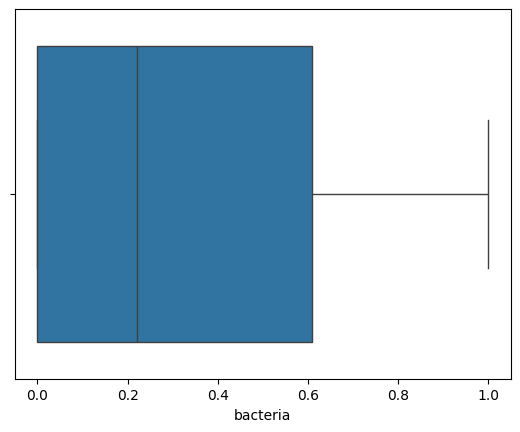

In [8]:
sns.boxplot(x=data["bacteria"])

<Axes: xlabel='bacteria', ylabel='is_safe'>

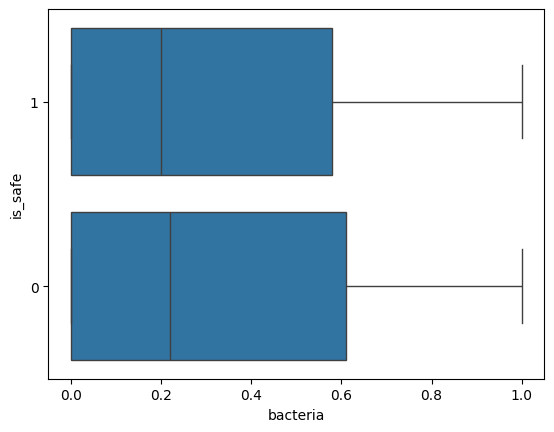

In [9]:
sns.boxplot(data=data ,x="bacteria",y="is_safe" )

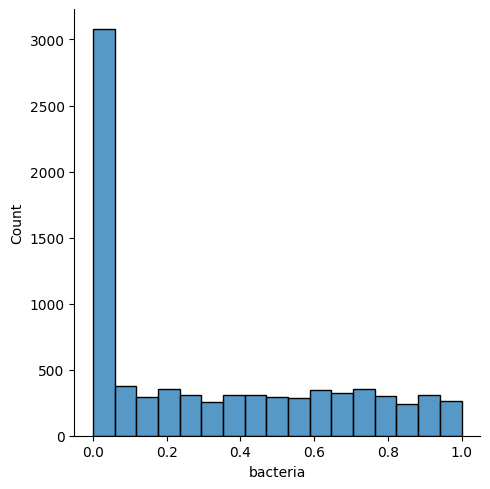

In [10]:
sns.displot(data['bacteria'])
plt.show()

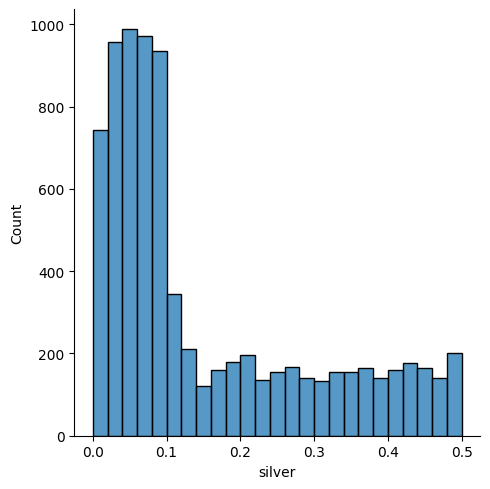

In [11]:
sns.displot(data['silver'])
plt.show()

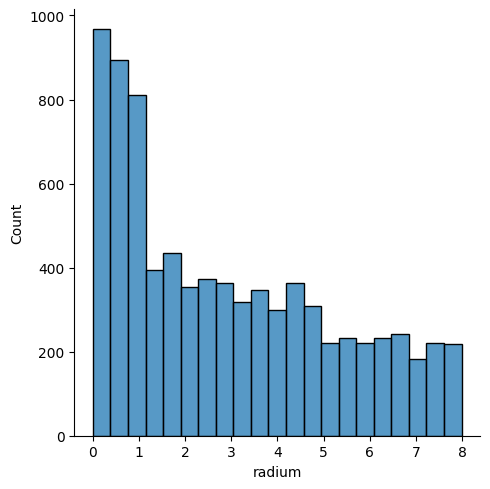

In [12]:
sns.displot(data['radium'])
plt.show()

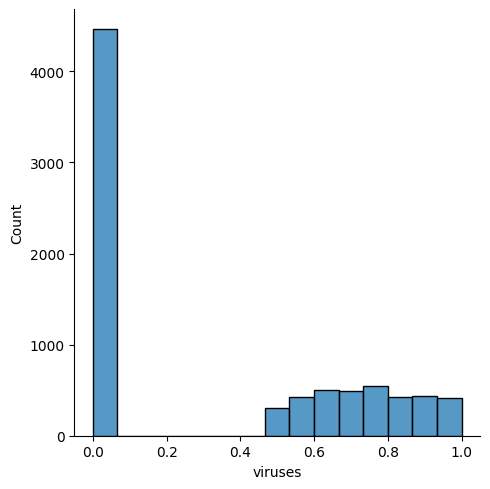

In [13]:
sns.displot(data['viruses'])
plt.show()

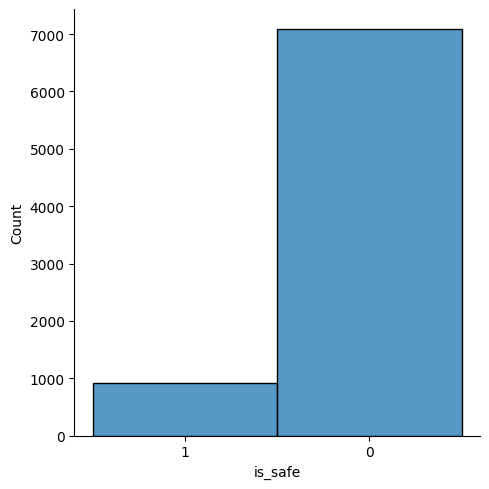

In [14]:
sns.displot(data['is_safe'])
plt.show()

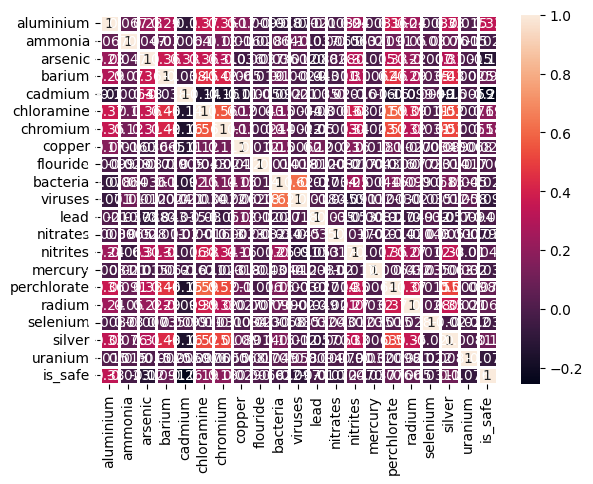

<Figure size 1000x600 with 0 Axes>

In [15]:
#Create heatmap
#correlation between features
corr_plot = sns.heatmap(data.corr(),annot = True,linewidths=1 )
plt.figure(figsize=(10,6))

plt.show()

In [16]:
#handle missing values in dataset
#pre processing check
#check for missing values
print(data.isnull().sum)



<bound method DataFrame.sum of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0         False    False    False   False    False       False     False   
1         False    False    False   False    False       False     False   
2         False    False    False   False    False       False     False   
3         False    False    False   False    False       False     False   
4         False    False    False   False    False       False     False   
...         ...      ...      ...     ...      ...         ...       ...   
7994      False    False    False   False    False       False     False   
7995      False    False    False   False    False       False     False   
7996      False    False    False   False    False       False     False   
7997      False    False    False   False    False       False     False   
7998      False    False    False   False    False       False     False   

      copper  flouride  bacteria  ...   lead  nitrates  

In [44]:
#identify duplicates
print(data.duplicated().sum())

0


In [53]:
#logistic regression model fitting
#build test train splits
from sklearn.model_selection import train_test_split
#seperate our independent(x) and dependent(y) variables
y = data['is_safe']
X  = data[['aluminium','ammonia','arsenic','barium', 'cadmium', 'chloramine', 'chromium','copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']]
           #'ammonia','arsenic','barium', 'cadmium', 'chloramine', 'chromium','copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium' ]]
#utilize the test_train_split function of the data, using 80% of training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
#print the sizes of the testing and training datasets
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (6396, 20)
train size y :  (6396,)
test size X :  (1600, 20)
test size y :  (1600,)


In [ ]:
#feature scaling for more appropriate proportions
#feature scalinmg is mostly used when the data isn't seeming to be proportional visually, 
#since this is very common, we are going to do it even if we don't need it here
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [76]:

#Actually doing logistic regression
#import library
from sklearn.linear_model import LogisticRegression
#initialize logistic regression function
logreg =LogisticRegression()
# train model to learn relationships between input and output variables
#model = sm.Logit(X_train,y_train)
results = logreg.fit(X_train,y_train)


In [56]:
#
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
#print a confusion matrix 
#copmpares performancer of the classification models
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)




[[1389   30]
 [ 123   58]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1419
           1       0.66      0.32      0.43       181

    accuracy                           0.90      1600
   macro avg       0.79      0.65      0.69      1600
weighted avg       0.89      0.90      0.89      1600



In [60]:
# Predict probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1] 
#y_test = y_test.map({'True': 1, 'False': 0}).astype(int)
print(y_pred_proba)

[0.2478689  0.17294394 0.05083616 ... 0.00342023 0.02394289 0.0137207 ]


In [78]:
#print data stats

print('model intercept :', results.intercept_) 
print('model coefficients : ', results.coef_) 
print('Model score : ', results.score(X, y)) 

model intercept : [-2.97205246]
model coefficients :  [[ 0.92952729 -0.20775121 -0.79669268  0.1551536  -0.77204246  0.46834463
   0.34172874 -0.24249462  0.08500484  0.229583   -0.44955243 -0.08944113
  -0.27546598 -0.15773238 -0.10077395 -0.46456892 -0.13638763 -0.17945021
  -0.22137373 -0.36162506]]
Model score :  0.8860680340170085


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


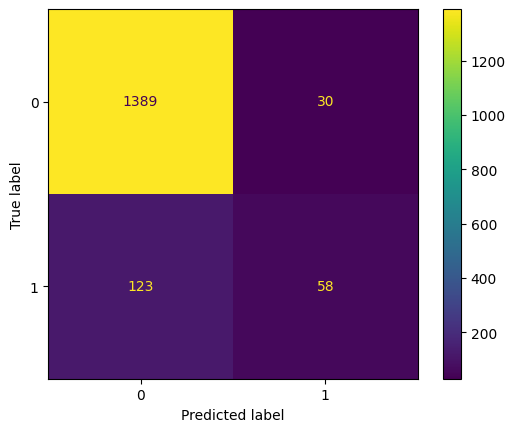

In [84]:
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()